## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single Lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [1]:
# Nothing to do here

## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of Lego sets!</p>

In [2]:
import pandas as pd

colors=pd.read_csv("datasets/colors.csv")
colors.head()


,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [3]:
# How many distinct colors are available?
num_colors = colors.rgb.size

# Print num_colors
print(num_colors)

135


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [4]:
colors_summary=colors.groupby('is_trans').count()
print(colors_summary)

           id  name  rgb
is_trans                
f         107   107  107
t          28    28   28


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

      set_num  name  theme_id  num_parts
year                                    
1950        7     7         7          7
1953        4     4         4          4
1954       14    14        14         14
1955       28    28        28         28
1956       12    12        12         12
...       ...   ...       ...        ...
2013      593   593       593        593
2014      715   715       715        715
2015      670   670       670        670
2016      609   609       609        609
2017      470   470       470        470

[66 rows x 4 columns]


<AxesSubplot:xlabel='year'>

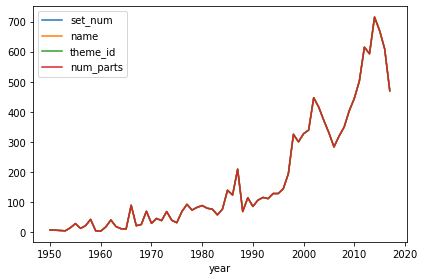

In [5]:
%matplotlib inline
# Read sets data as `sets`
sets=pd.read_csv("datasets/sets.csv")
sets.head()

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year=sets.groupby('year').count()
print(parts_by_year)

# Plot trends in average number of parts by year
parts_by_year.plot()


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [9]:
themes_by_year=sets.groupby('year')[['theme_id']].count()
print(themes_by_year)

      theme_id
year          
1950         7
1953         4
1954        14
1955        28
1956        12
...        ...
2013       593
2014       715
2015       670
2016       609
2017       470

[66 rows x 1 columns]


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. Before we wrap up, let's take a closer look at the <code>themes_by_year</code> DataFrame you created in the previous step.</p>

In [11]:
# Get the number of unique themes released in 1999
num_themes=sets.groupby('year')[['theme_id']].count(1999)

# Print the number of unique themes released in 1999
print(num_themes)

TypeError: count() takes 1 positional argument but 2 were given